In [7]:
## load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings ('ignore')

In [8]:
df=pd.read_csv('stud.csv')

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [10]:
#checks:
## checking missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### insights  or observations

In [12]:
## There ara no missing values

In [13]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [17]:
## how to check duplicate
df[df.duplicated()].sum()

gender                         0.0
race_ethnicity                 0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64

In [18]:
## there are no duplicates

In [20]:
## check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
## check the unique values count in dataset
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [23]:
## check the statistics for dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insights or above observation
- mean values is 66 to 69
- std deviation 14.6 to 15.19
- min of maths is 0 and reading is 17 and writing 10

### EDA

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
numerical=[featur for featur in df.columns if df[featur].dtype !='O']
categorical=[featur for featur in df.columns if df[featur].dtype =='O']

In [40]:
categorical

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [41]:
numerical

['math_score', 'reading_score', 'writing_score']

In [42]:
df['total']=df['math_score']+df['reading_score']+df['writing_score']
df['average']= df['total']/3

In [44]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


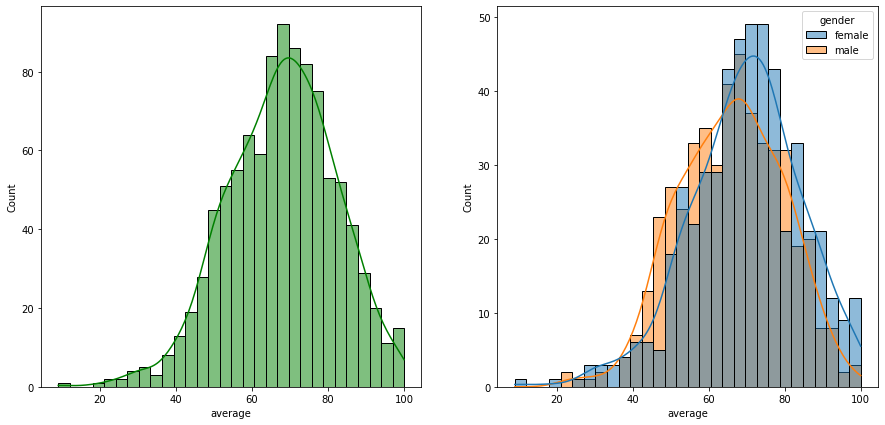

In [53]:
##3 explore more visualizatiosn
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True, hue='gender')
plt.show()

## insights
- female students tend to perfrom well than male students

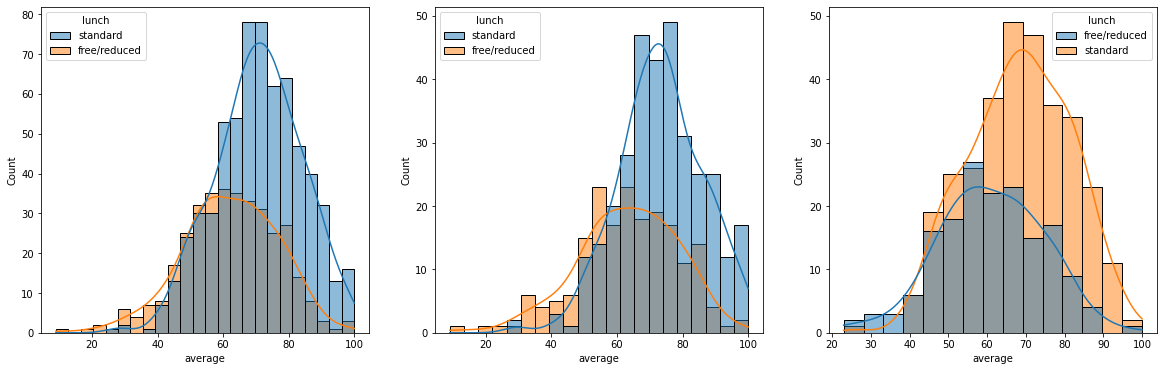

In [64]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True, hue='lunch')
plt.show()

## insights
- standard lucch help to students perform well
- standard lucch help to students perform well in both male and femle

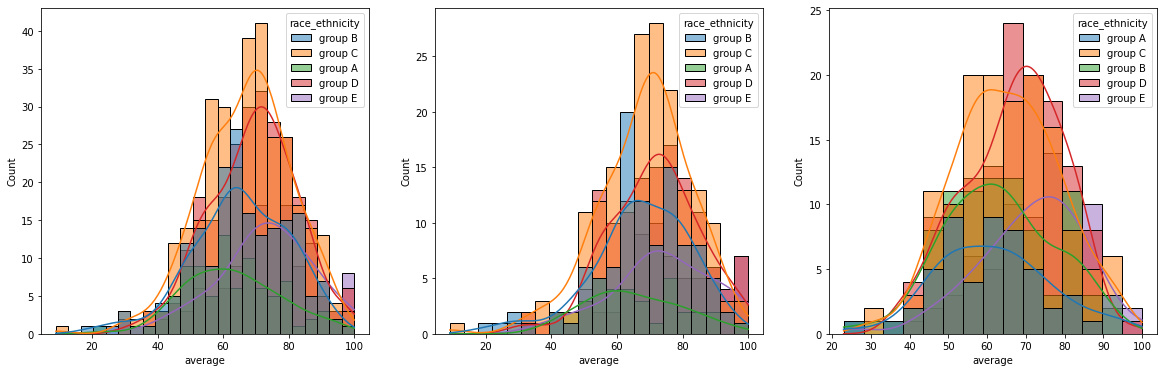

In [65]:

plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True, hue='parental_level_of_education')
plt.show()

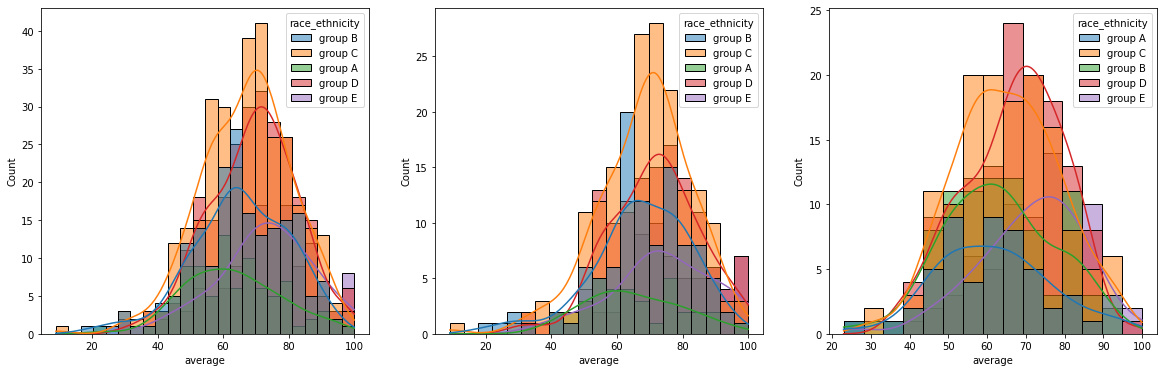

In [67]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True, hue='race_ethnicity')
plt.show()

## insights
- staudnts of group a and group b perfrom poor in exam


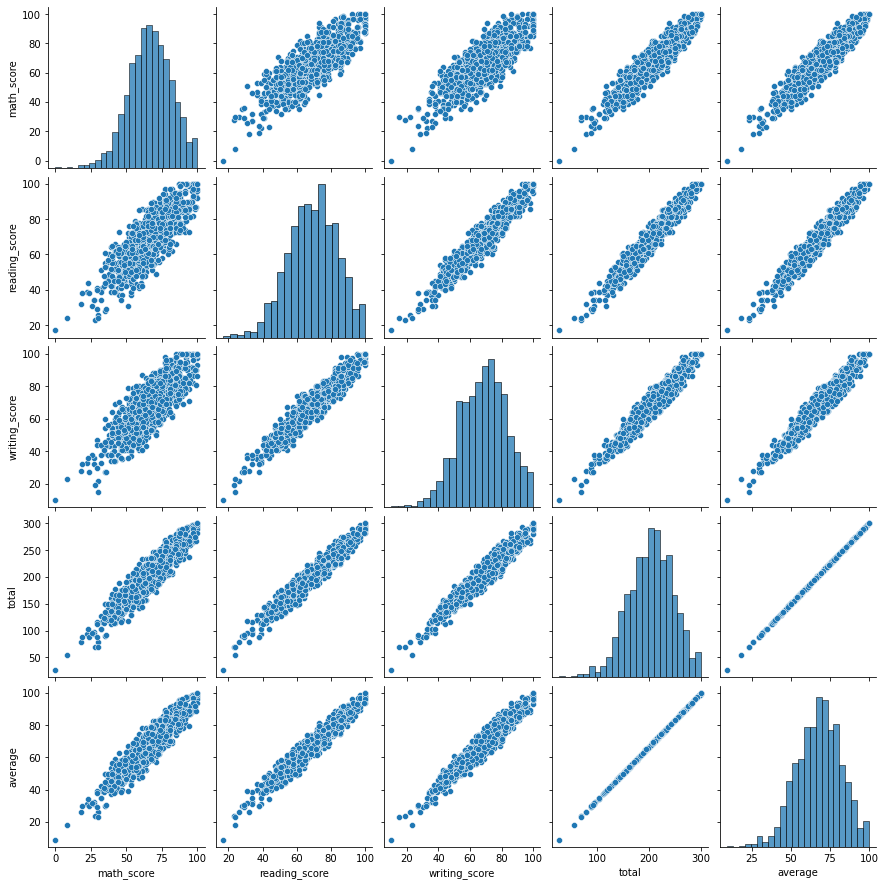

In [70]:
sns.pairplot(df)

<AxesSubplot:>

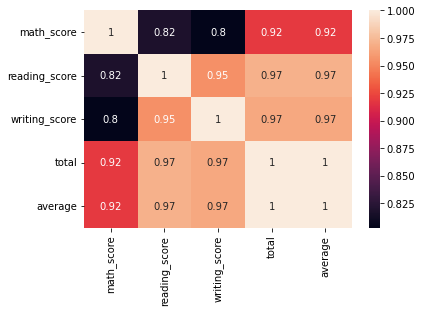

In [73]:
sns.heatmap(df.corr(),annot=True)